In [60]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [3]:
def calc_dists(arr):
    split_arr = np.split(arr, 10)
    centroids = []
    for speaker in split_arr:
        centroid = np.mean(speaker, axis=0)
        centroids.append(centroid)

    intra_dists = []
    for i, speaker in enumerate(split_arr):
        intra_dist = np.mean(np.sqrt(np.sum(np.square(speaker - centroids[i]), axis=1)))
        intra_dists.append(intra_dist)

    inter_dists = []
    for cent_idx in range(len(centroids)-1):
        dists_btwn = np.sqrt(np.sum(np.square(centroids[cent_idx] - centroids[cent_idx+1:]), axis=1))
        inter_dists.append(dists_btwn)

    collected_inter_dists = np.concatenate((
        inter_dists[0], 
        inter_dists[1],
        inter_dists[2],
        inter_dists[3],
        inter_dists[4],
        inter_dists[5],
        inter_dists[6],
        inter_dists[7],
        inter_dists[8],
        ), axis=0)

    avg_intra_dist = np.mean(intra_dists)
    avg_inter_dist = np.mean(collected_inter_dists)
    
    return [avg_intra_dist, avg_inter_dist]

In [4]:
root_dir = "C:/Users/Henry/OneDrive - Monash University/University/5th Year/FYP/Data/ge2e_run"
dists = []
for file in os.listdir(root_dir):
    filename = os.fsdecode(file)
    if filename.endswith(".npy"):
        arr_ = np.load(os.path.join(root_dir, filename))
        dists.append(calc_dists(arr_))
dists = np.array(dists)

In [49]:
def plot_inter_intra_dist(root_dir, run_name):
    dists = []
    for file in os.listdir(root_dir):
        filename = os.fsdecode(file)
        if filename.endswith(".npy"):
            arr_ = np.load(os.path.join(root_dir, filename))
            dists.append(calc_dists(arr_))
    dists = np.array(dists)
    dists = dists[:100]

    fig1, (ax1,ax2) = plt.subplots(1,2, figsize=(20,10))
    ax1.plot(dists[:,0])
    ax1.set_title(f"Intra-Class Distance over {run_name} Training.", size=20)
    ax1.set_xlabel("Training Step (per 10)", size=20)
    ax1.set_ylabel("Average Intra-Class Distance", size=20)

    ax2.plot(dists[:,1])
    ax2.set_title(f"Inter-Class Distance over {run_name} Training.", size=20)
    ax2.set_xlabel("Training Step (per 10)", size=20)
    ax2.set_ylabel("Average Inter-Class Distance", size=20)

    return dists

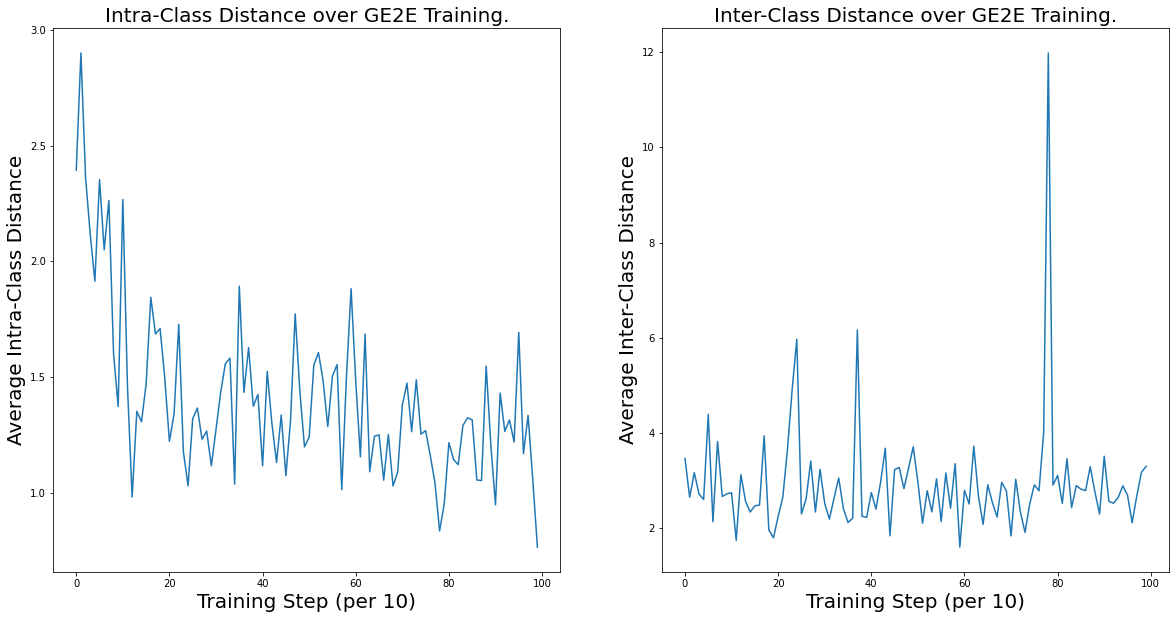

In [50]:
ge2e_dir = "C:/Users/Henry/OneDrive - Monash University/University/5th Year/FYP/Data/ge2e_run"
ge2e_dists = plot_inter_intra_dist(ge2e_dir, run_name="GE2E")

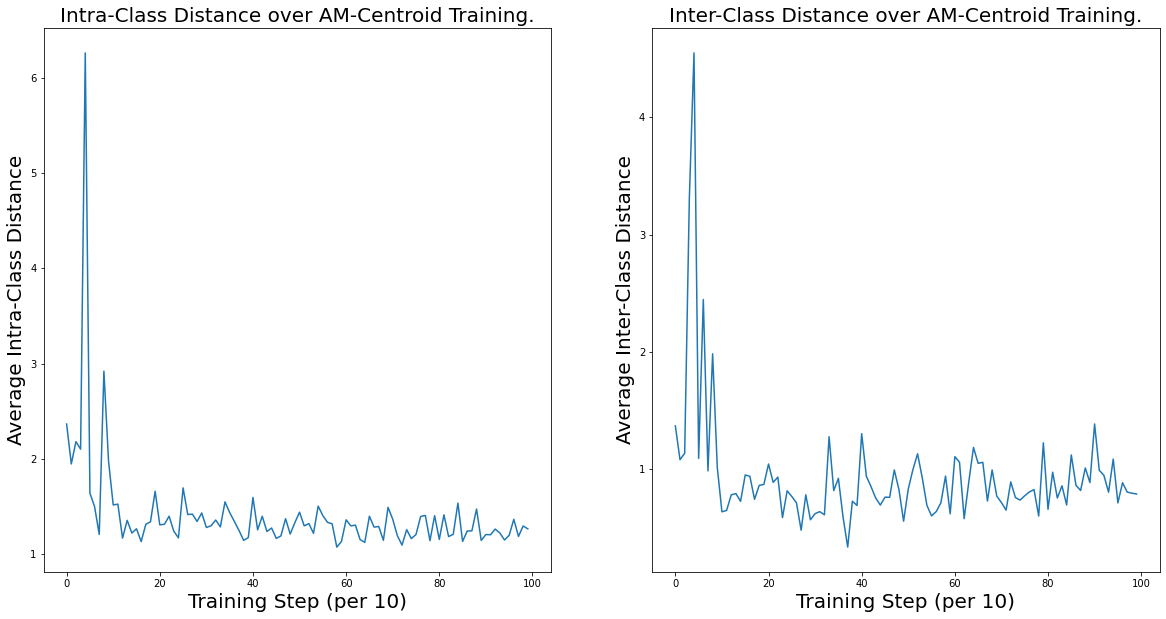

In [51]:
am_dir = "C:/Users/Henry/OneDrive - Monash University/University/5th Year/FYP/Data/am_run"
am_dists = plot_inter_intra_dist(am_dir, "AM-Centroid")

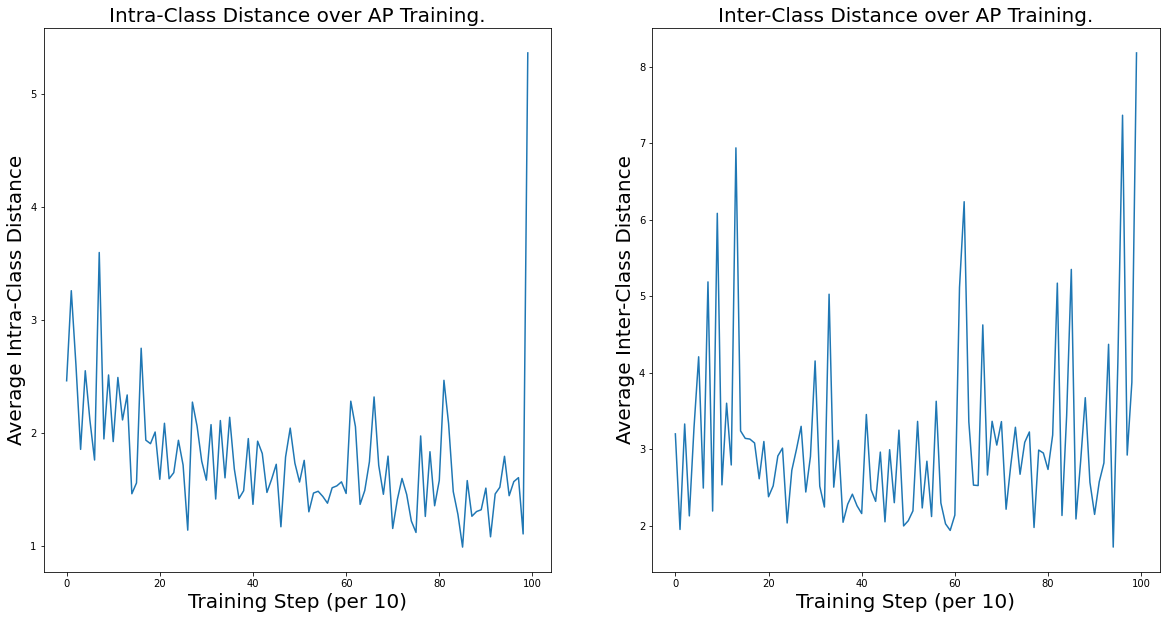

In [52]:
ap_dir = "C:/Users/Henry/OneDrive - Monash University/University/5th Year/FYP/Data/ap_run"
ap_dists = plot_inter_intra_dist(ap_dir, "AP")

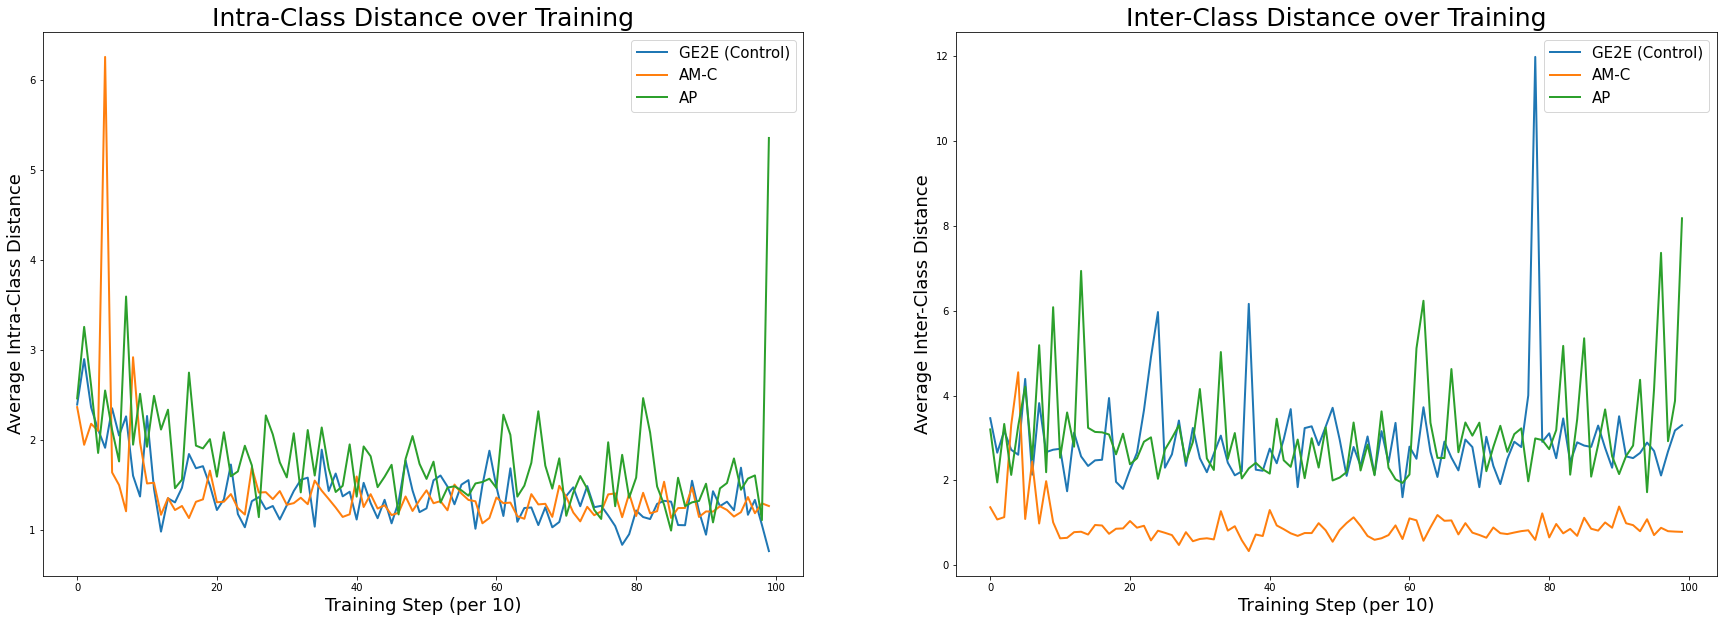

In [95]:
fig2, (ax21, ax22) = plt.subplots(1,2, figsize=(30,10))

ax21.plot(ge2e_dists[:,0], linewidth=2, label="GE2E (Control)")
ax21.plot(am_dists[:,0], linewidth=2, label="AM-C")
ax21.plot(ap_dists[:,0], linewidth=2, label="AP")
ax21.set_title("Intra-Class Distance over Training", size=25)
ax21.set_xlabel("Training Step (per 10)", size=18)
ax21.set_ylabel("Average Intra-Class Distance", size=18)
ax21.legend(prop={'size': 15})

ax22.plot(ge2e_dists[:,1], linewidth=2, label="GE2E (Control)")
ax22.plot(am_dists[:,1], linewidth=2, label="AM-C")
ax22.plot(ap_dists[:,1], linewidth=2, label="AP")
ax22.set_title("Inter-Class Distance over Training", size=25)
ax22.set_xlabel("Training Step (per 10)", size=18)
ax22.set_ylabel("Average Inter-Class Distance", size=18)
ax22.legend(prop={'size': 15})

In [81]:
# order: ge2e, AM-C, AP
eer_dir = "C:/Users/Henry/OneDrive - Monash University/University/5th Year/FYP/Data/eer_data.csv"
loss_dir = "C:/Users/Henry/OneDrive - Monash University/University/5th Year/FYP/Data/loss_data.csv"
eer_data = pd.read_csv(eer_dir, index_col=False)
loss_data = pd.read_csv(loss_dir, index_col=False)

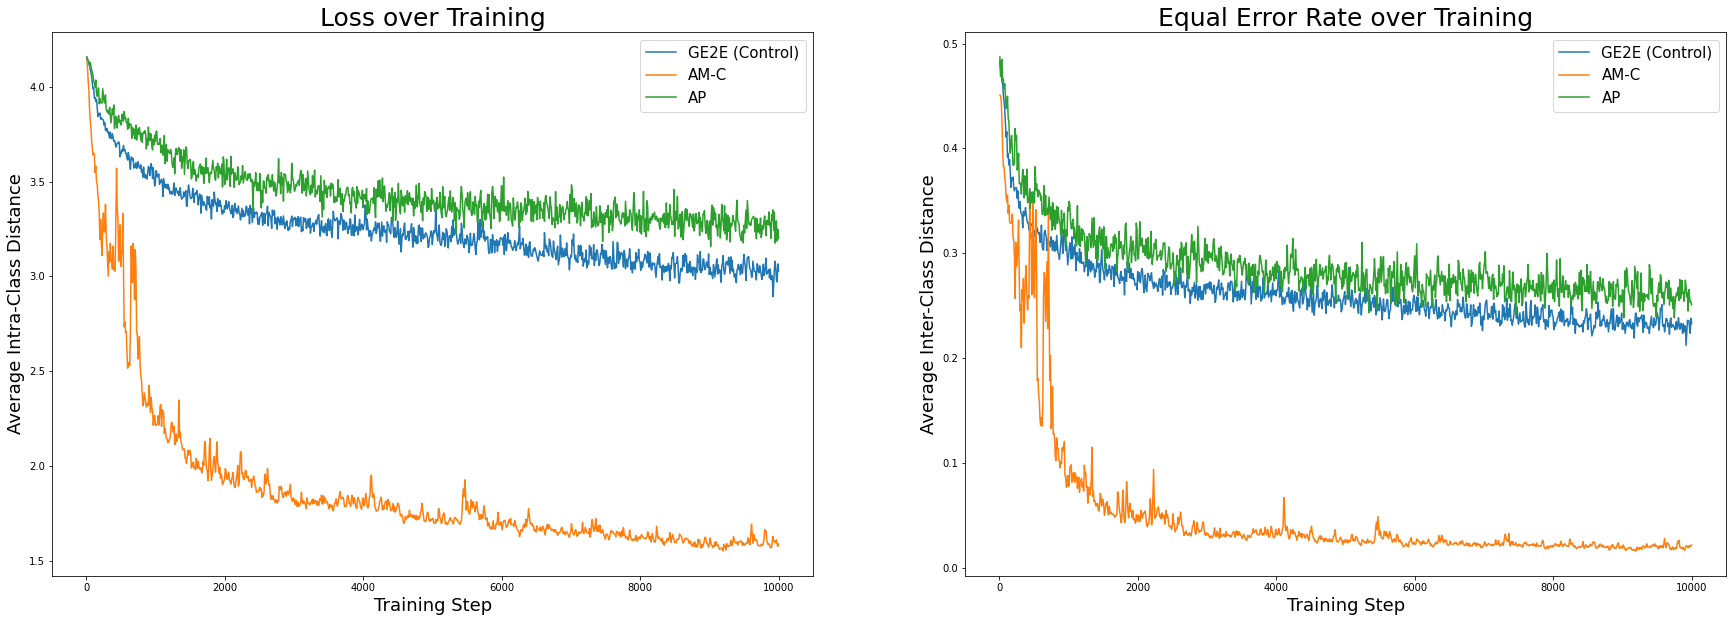

In [89]:
step_arr = eer_data["Step"]

fig3, (ax31, ax32) = plt.subplots(1,2, figsize=(30,10))

ax31.plot(step_arr, loss_data["GE2E"], label="GE2E (Control)")
ax31.plot(step_arr, loss_data["AM-C"], label="AM-C")
ax31.plot(step_arr, loss_data["AP"], label="AP")
ax31.set_title("Loss over Training", size=25)
ax31.set_xlabel("Training Step", size=18)
ax31.set_ylabel("Average Intra-Class Distance", size=18)
ax31.legend(prop={'size': 15})

ax32.plot(step_arr, eer_data["GE2E"], label="GE2E (Control)")
ax32.plot(step_arr, eer_data["AM-C"], label="AM-C")
ax32.plot(step_arr, eer_data["AP"], label="AP")
ax32.set_title("Equal Error Rate over Training", size=25)
ax32.set_xlabel("Training Step", size=18)
ax32.set_ylabel("Average Inter-Class Distance", size=18)
ax32.legend(prop={'size': 15})

In [96]:
loss_data.iloc[-1]

Step    10000.000000
GE2E        3.029632
AM-C        1.590519
AP          3.198932
Name: 999, dtype: float64

In [97]:
eer_data.iloc[-1]

Step    10000.000000
GE2E        0.233046
AM-C        0.021947
AP          0.250918
Name: 999, dtype: float64